In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
dataset_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [6]:
dataset_train.shape

(1258, 6)

In [11]:
# selecting only one column at index location 1 that is 'open' and converting it into array

training_set=dataset_train.iloc[:,1:2].values

In [12]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [13]:
training_set.shape

(1258, 1)

In [14]:
# feature scaling using normilization

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [15]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [16]:
# Data Structure Creation
x_train=[]
y_train=[]

for i in range(60,1257):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
#converting x_train and y_train into numpy array
x_train,y_train=np.array(x_train),np.array(y_train)


In [17]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92493861, 0.92106928, 0.92438053, ..., 0.96123223, 0.95475854,
        0.95204256],
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128]])

In [19]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95163331, 0.95725128,
       0.93796041])

In [20]:
x_train.shape

(1197, 60)

In [21]:
# reshape the dataset because RNN take input in 3d
x_train=x_train.reshape(1197,60,1)


In [22]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92493861],
        [0.92106928],
        [0.92438053],
        ...,
        [0.96123223],
        [0.95475854],
        [0.95204256]],

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]]])

In [24]:
# model creation
model=tf.keras.models.Sequential()


In [27]:
# add LSTM layer
model.add(tf.keras.layers.LSTM(units=50,activation='relu',return_sequences=True,input_shape=(60,1)))

# add Dropout layer drop 0.2 means 20% neurons to implemement regularization
model.add(tf.keras.layers.Dropout(0.2))

# add second LSTM layer
model.add(tf.keras.layers.LSTM(units=50,activation='relu',return_sequences=True))
# add Dropout layer drop 0.2 means 20% neurons to implemement regularization
model.add(tf.keras.layers.Dropout(0.2))

# add third LSTM layer
model.add(tf.keras.layers.LSTM(units=50,activation='relu',return_sequences=True))
# add Dropout layer drop 0.2 means 20% neurons to implemement regularization
model.add(tf.keras.layers.Dropout(0.2))


# add fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=50,activation='relu'))
# add Dropout layer drop 0.2 means 20% neurons to implemement regularization
model.add(tf.keras.layers.Dropout(0.2))

# add output layer
model.add(tf.keras.layers.Dense(units=1))



C:\Users\ilihas\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# Compile the model

# binary cross entropy is the loss function used for classification only
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [30]:
model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 5)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 206ms/step - loss: 0.1567
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - loss: 0.0128
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/step - loss: 0.0087
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 214ms/step - loss: 0.0082
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - loss: 0.0074


In [31]:
# Testing
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [32]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [33]:
# selecting only one column at index location 1 that is 'open' and converting it into array of test dataset

real_stock_price=dataset_test.iloc[:,1:2].values

In [34]:
real_stock_price.shape

(20, 1)

In [37]:
# vertical concat use 0, horizontal uses 1

dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [38]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [40]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [42]:
# convert input from 1d to 2d array
inputs=inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [44]:
#scale input
inputs = sc.transform(inputs)
inputs

array([[-0.5175052 ],
       [-0.51750291],
       [-0.51750966],
       [-0.51747869],
       [-0.51748873],
       [-0.51749752],
       [-0.51749603],
       [-0.51750243],
       [-0.51747457],
       [-0.51743862],
       [-0.51742111],
       [-0.51744983],
       [-0.51741557],
       [-0.5173748 ],
       [-0.51741059],
       [-0.51742907],
       [-0.51740363],
       [-0.5174482 ],
       [-0.51749174],
       [-0.51750797],
       [-0.51754586],
       [-0.51760327],
       [-0.51752077],
       [-0.51748997],
       [-0.51750195],
       [-0.51746308],
       [-0.51758292],
       [-0.51758618],
       [-0.51761604],
       [-0.51758756],
       [-0.517547  ],
       [-0.5175316 ],
       [-0.51756192],
       [-0.51752724],
       [-0.5175442 ],
       [-0.51755621],
       [-0.51757095],
       [-0.51753105],
       [-0.5175361 ],
       [-0.51757981],
       [-0.51762428],
       [-0.51757887],
       [-0.51755458],
       [-0.51756749],
       [-0.51752776],
       [-0

In [45]:
# creating test Data structure 
x_test=[]

for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
    
x_test=np.array(x_test)

x_test

In [47]:
# convert x_test to 3d 

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [48]:
x_test.shape

(20, 60, 1)

In [49]:
# model prediction 

predicted_stock_price = model.predict(x_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


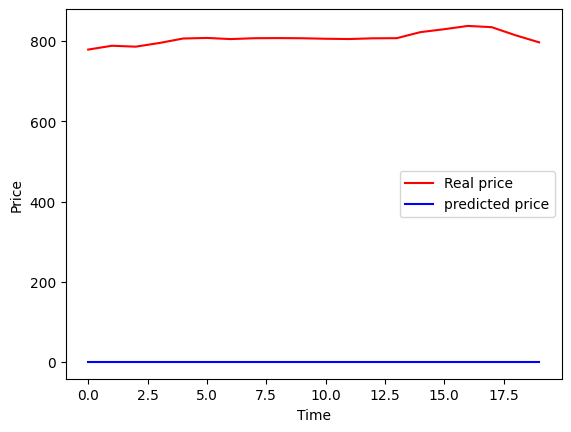

In [51]:
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price,color='blue',label='predicted price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()